In [724]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
%matplotlib inline
#%load_ext tensorboard

print(tf.__version__)

2.6.0


In [725]:
class MandelbrotDataSet:
    def __init__(self, size=1000, max_depth=100, xmin=-2.0, xmax=0.7, ymin=-1.3, ymax=1.3):
        self.x = tf.random.uniform((size,),xmin,xmax,tf.float32)
        self.y = tf.random.uniform((size,),ymin,ymax,tf.float32)
        self.outputs = self.mandel(x=self.x, y=self.y,max_depth=max_depth)
        self.data = tf.stack([self.x, self.y], axis=1)

    @staticmethod
    def mandel(x, y, max_depth):
        zx, zy = x,y
        for n in range(1, max_depth):
            zx, zy = zx*zx - zy*zy + x, 2*zx*zy + y
        return tf.cast(tf.less(zx*zx+zy*zy, 4.0),tf.float32)

In [726]:
trainingData = MandelbrotDataSet(100_000)

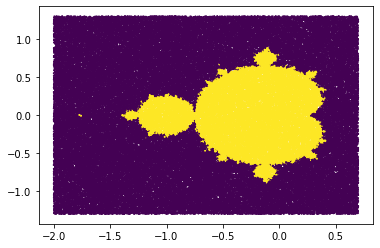

In [727]:
#plt.scatter(trainingData.x, trainingData.y, s=1, c=trainingData.outputs)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation=None)
])
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["mae"])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(trainingData.data, trainingData.outputs,epochs=50,batch_size=100,callbacks=[tensorboard_callback])

2021-11-23 19:41:38.968761: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-23 19:41:38.968771: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-23 19:41:38.968851: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-23 19:41:39.118758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/50
  19/1000 [..............................] - ETA: 8s - loss: 0.2188 - mae: 0.2188  

2021-11-23 19:41:39.306496: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-23 19:41:39.306507: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-23 19:41:39.335045: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-23 19:41:39.335316: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-23 19:41:39.335836: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20211123-194138/train/plugins/profile/2021_11_23_19_41_39

2021-11-23 19:41:39.336114: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/20211123-194138/train/plugins/profile/2021_11_23_19_41_39/MacBook-Air-de-ker.local.trace.json.gz
2021-11-23 19:41:39.336356: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20211123-194138/

1000/1000 [==============================] - 7s 7ms/step - loss: 0.0618 - mae: 0.0618

In [ ]:
np.set_printoptions(precision=3, suppress=True)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
#  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [mae]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
predictions = model.predict(trainingData.data)
print("predictions shape:", predictions.shape)

In [ ]:
plt.scatter(trainingData.x, trainingData.y, s=1, c=predictions)